
# Project: Investigate a "No-show appointments" Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset being investigated is information collected from 100k medical appointments in Brazil. The focus is to find out whether or not patients show up for their appointment. 

The dataset has 110527 patients and 14 columns. The columns include:
>1. `Patient ID` is a unique identifier of the patient.
>2. `Appointment ID` is a unique identifier of the appointment.
>3. `Gender` tells us the gender of the patient.
>4. `ScheduledDay` tells us on what day the patient set up their appointment.
>5. `AppointmentDay` tells us the day of the appointment.
>6. `Age` tells us the age of the patient.
>7. `Neighbourhood` indicates the location of the hospital.
>8. `Scholarship` indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>9. `Hypertension` indicates a '1' if the patient has hypertension, and '0' if the patient does not have.
>10. `Diabetes` indicates a '1' if the patient has diabetes, and '0' if the patient does not have.
>11. `Alcoholism` indicates a '1' if the patient is an alcoholic, and '0' if the patient is not.
>12. `Handicap` indicates a '1' if the patient is handicapped, and '0' if the patient is not.
>13. `SMS_received` indicates if the patient recieved an SMS to remind them of the appointment.
>14. `No-show` indicates ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.





### Question(s) for Analysis

What is the overall percentage of patients who show up to appointments?

Does Age affect showing up to an appointment?

Which gender has the highest rate of showing up at appointments?

Is there a relationship between the disease type and whether or not they show up for appointment?
 
Is there a correlation between having a scholarship and showing up for appointments?

Is there any correlation between a patient's age and diseases?

Does SMS Recieved affect the attendance of a patient to the appointment?

In [1]:
#Importing all the packages required.
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### In this section, data is loaded from the csv file and several functions are used to understand and explore the nature of the data given.




In [2]:
#Opening the csv file using pandas.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# View the first 6 rows of the loaded dataset. 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#View the number of patients and the number of columns in the dataset
df.shape

(110527, 14)

> It is noted that there are 110527 patients in our dataset and 14 columns describing the details of each patient.

#### Using the info function of pandas, the datatypes of the columns and the presence of any null values is investgated.

In [4]:
# Check the datatypes of the columns in the dataset
# Check for null values in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> It is noted that:
>1. There are no null values in any column in this dataset.
>2. `ScheduleDay` and `AppointmentDay` datatype is in a string(object) format and should be converted to a datetime format.
>3. `No-show` is found to be in a string(object) format but for analysis purposes should be convered to boolean format.


In [5]:
#eturns description of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The minimum value of `Age` is -1 which is an invalid value which needs to be looked into. Further analysis of age is observed below.

In [6]:
#Further analysis for the Age column
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [7]:
#Check for duplicates values in the dataset
df.duplicated().sum()


0

> It is noted that all the patient information in each row is unique and has not been repeated.

There are no duplicated rows but we need to make sure there are no duplicated Patients. First we find out are there any duplicated patients?

In [8]:
#Let us find the column names first
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
# Check for duplicated patients
df.PatientId.duplicated().sum()

48228

> There seems there are 48,228 instances of patients being repeated in the rows.

How many patients with the same schedule day and appointment day have been repeated?

In [10]:
# Check for how many patients with same schedule and appointment day have been repeated
df.duplicated(subset=['PatientId','AppointmentDay','ScheduledDay']).sum()

1334

> There are 13,334 duplicates that have been found

How many have the same No-show?

In [11]:
#Checking for number of duplicated rows
df.duplicated(subset=['PatientId','AppointmentDay', 'ScheduledDay','No-show']).sum()

1305

> There are 1,305 duplicates found

Our main focus is whether patients showed up to the appointment, so this means if we have the same patient with the same appointment day, schedule day and have the same no show category then we need to drop them.

In [12]:
#Check for the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

`Handcap` has 5 unique values. 

In [13]:
#Check the unique values in the Handicap column
df.Handcap.unique()

array([0, 1, 2, 3, 4])

It is only require 0 (to represent not handicapped) and 1 (to represent handicapped)

<a id='cleaning'></a>
## Data Cleaning

### In this section, the data will be cleaned before any further analysis.

**We have analysed our data and we need to work the following areas:** 
1. Remove the invalid value of `Age`(-1).
2. Narrow down the 5 unique values of `Handcap` to 2.
3. Remove the duplicated patients.
4. Change `ScheduleDay` and `AppointmentDay` to datetime format.
5. Change `No-show`,`Scholarship`,`Hipertension`, `Diabetes`, `Alcoholism` and `SMS_recieved` to boolean.
6. Drop `PatientId` and `AppointmentID`.

 

**Clean `Age` column**

In [14]:
#Find the row with the -1 value.
df[df.Age < 0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


The row above is to be dropped.

In [15]:
#Check if the -1 row is dropped
df.drop(df[df.Age < 0].index, inplace = True)
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


**Clean `Handcap` column**

In [16]:
#Find the rows with values greater than 1.
df[df.Handcap > 1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


All of these rows need to be changed to 1 to show they are handicapped.

In [17]:
# Change the other unique values to 1 in the Handicap column
df.loc[df.Handcap.isin([2, 3, 4]), 'Handcap'] = 1


In [18]:
#Confirm only 2 unique values are there
df.Handcap.unique()

array([0, 1])

**Remove the duplicated patients.**

In [19]:
#Remove the duplicates from the dataset
df.drop_duplicates(['PatientId','AppointmentDay', 'ScheduledDay','No-show'], inplace=True)

In [20]:
#Confirm the duplicates have been removed
df.duplicated(subset=['PatientId','AppointmentDay', 'ScheduledDay','No-show']).sum()

0

**Change `ScheduledDay`and `AppointmentDay` to datetime format.**

In [21]:
#Change the data type of ScheduledDay and AppointmentDay to date time format
df.ScheduledDay = df.ScheduledDay.astype('datetime64')
df.AppointmentDay= df.AppointmentDay.astype('datetime64')
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

**Change `Scholarship`,`Hipertension`, `Diabetes`, `Alcoholism`, `Handcap` and `SMS_recieved` to boolean.**

In [22]:
#Change Scholarship,Hipertension, Diabetes, Alcoholism, Handcap and SMS_recieved data type to boolean.
df.Scholarship = df.Scholarship.astype('bool')
df.Hipertension = df.Hipertension.astype('bool')
df.Diabetes = df.Diabetes.astype('bool')
df.Alcoholism = df.Alcoholism.astype('bool')
df.Handcap = df.Handcap.astype('bool')
df.SMS_received = df.SMS_received.astype('bool')

df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                 bool
Hipertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_received                bool
No-show                   object
dtype: object

**Change values of the `No-show` column**

First, we need to rename the column to Show, so that if the showed up it will be indicated as True, otherwise False if they did not show up.

In [23]:
#Rename the column to Show
df.rename(columns = {'No-show':'Show'}, inplace = True)

In [24]:
# Check for the column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Show'],
      dtype='object')

In [25]:
# Change the data type in Show to True and False
df.loc[df.Show.isin(['No']), 'Show'] = True
df.loc[df.Show.isin(['Yes']), 'Show'] = False
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                 bool
Hipertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_received                bool
Show                      object
dtype: object

In [26]:
# Check the unique values in the Show column
df.Show.unique()

array([True, False], dtype=object)

**Drop `PatientId` and `AppointmentID`**

Both of these columns will not be used for further analysis because they do not assist in predicting whether the patients attended the scheduled appointment.

In [27]:
#Remove the PatientId and AppointmentID columns from the data
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show


**Final cleaning**

In [28]:
# Rename the Hypertension and Handicap columns
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True


#### Summary of the Data Cleaning process:

1. Removed the row with -1 in `Age` column.


2. Changed all the values in the `Handicap` column to 1 and 0 then changed this column to boolean data type.


3. Removed the duplicated patients rows.


4. Changed `ScheduledDay` and `AppointmentDay` to datetime format.


5. Changed `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, and `SMS_recieved` to boolean.


6. Changed the values of the `No-show` column.


7. Dropped `PatientId` and `AppointmentID` columns because they wont be needed for further analysis.


8. Renamed columns: No-show, Hipertension and Handcap.

<a id='eda'></a>
## Exploratory Data Analysis

### In this section, the cleaned data will be analysed using questions

### Q1: What is the overall percentage of patients who show up to appointments?

In [29]:
#Define a function called PieChart that will give the sum of each unique value of a column in percentage
def PieChart(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

True     79.97
False    20.03
Name: Show, dtype: float64

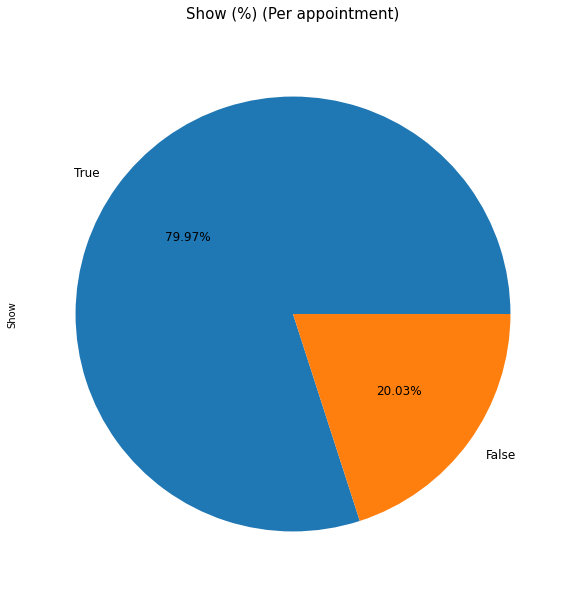

In [30]:
#Call the function PieChart to check the Show column
PieChart(df, 'Show')

> 79.97% of the patients attended their scheduled appointment

### Q2: Does Age affect showing up to an appointment?

**Check the `Age` distribution among patients**

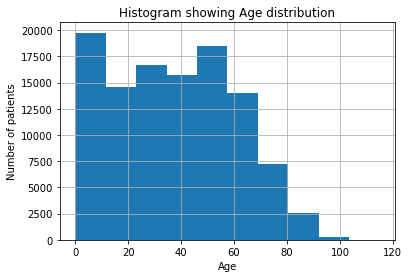

In [31]:
#Let us check the age distribution first
df.Age.hist();
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Histogram showing Age distribution');
plt.grid(True)

> The histogram seems to be skewed to the right. This means that most patients range from 0 years to late 50's

**Check the relationship between `Age` and `Show`**

In [32]:
# Divide the patients into showing up and not showing categories. 
Showedup = df.Show == True
notshowedup = df.Show == False

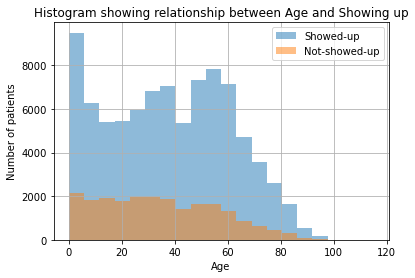

In [33]:
#Look at the reltionship between Age and Show columns
df.Age[Showedup].hist(alpha=0.5, bins=20, label='Showed-up')
df.Age[notshowedup].hist(alpha=0.5, bins=20, label='Not-showed-up')
plt.legend();
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Histogram showing relationship between Age and Showing up');

> It seems that people who are younger tend to miss their appointments more than the people over 60.

### Q3: Which gender has the highest rate of showing up at appointments?

**Check the `Gender` distribution among patients**

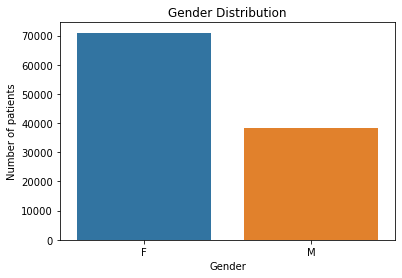

In [34]:
# Show Gender distribution in terms of patients count
sns.countplot(x = 'Gender', data = df)
plt.title("Gender Distribution")
plt.xlabel("Gender");
plt.ylabel("Number of patients")
plt.show()


F    65.0
M    35.0
Name: Gender, dtype: float64

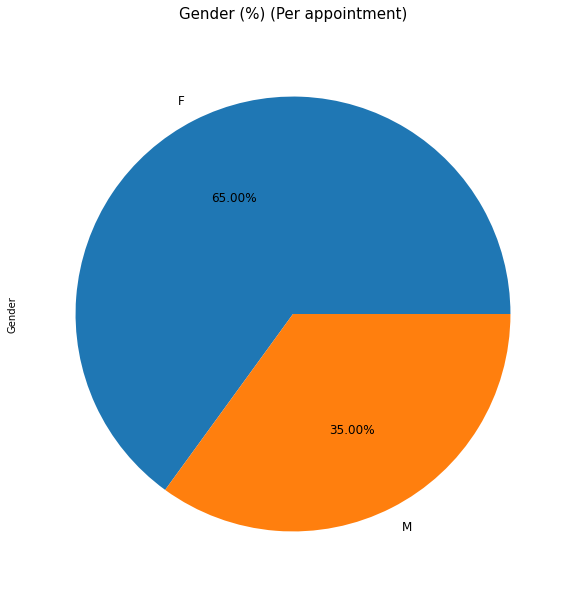

In [35]:
#Show Gender distribution in terms of percentage.
PieChart(df, 'Gender')

> Female patients make up 65% of the patients.

**Check the relationship between `Gender` and `Show`**

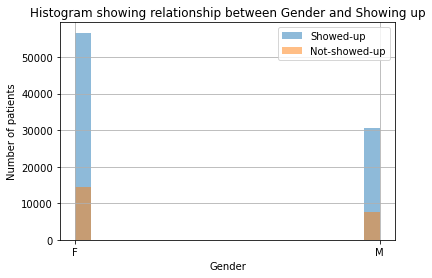

In [36]:
# showing the gender distribution with respect to the Show colunmn
df.Gender[Showedup].hist(alpha=0.5, bins=20, label='Showed-up')
df.Gender[notshowedup].hist(alpha=0.5, bins=20, label='Not-showed-up')
plt.legend();
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Histogram showing relationship between Gender and Showing up');

> The male patients tend not to attend the scheduled appointment.

### Q4: Is there a relationship between the disease type and whether or not they show up for appointment?

**First let us check the `Hypertension` distribution in the patients**

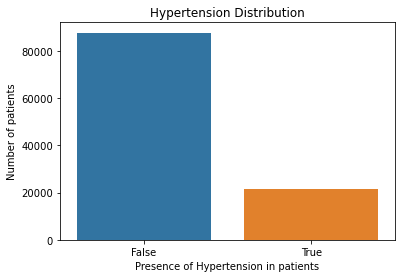

In [37]:
#Check how many patients have hypertension
sns.countplot(x = 'Hypertension', data = df)
plt.title("Hypertension Distribution")
plt.xlabel("Presence of Hypertension in patients");
plt.ylabel("Number of patients")
plt.show()

False    80.26
True     19.74
Name: Hypertension, dtype: float64

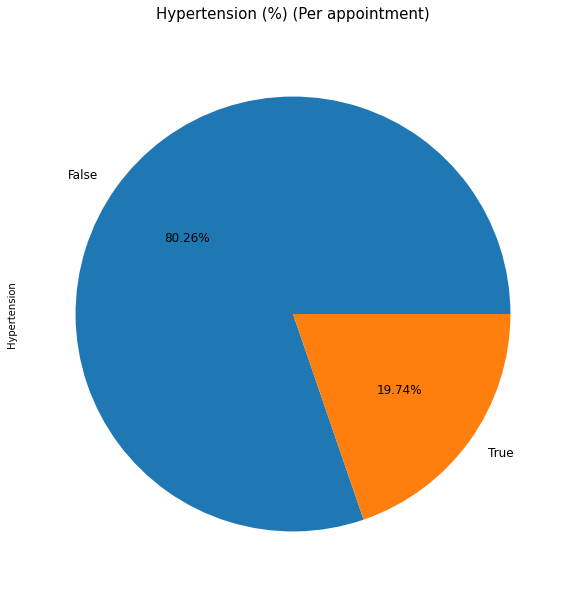

In [38]:
#Check how many patients have hypertension  in terms of percentage
PieChart(df, 'Hypertension')

> 19.74% of the patients have hypertension

**Check the relationship between `Hypertension` and `Show`**

In [39]:
#Check the relationship of Hypertension patients and Show in terms of mean
df.groupby(['Hypertension'], as_index=True)["Show"].mean()

Hypertension
False    0.792585
True     0.828586
Name: Show, dtype: float64

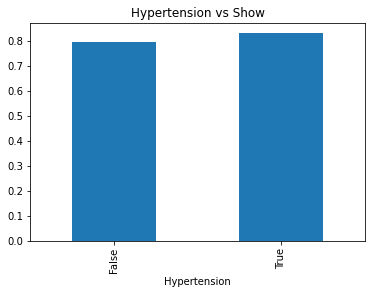

In [40]:
#Draw a bar graph of the relationship between the Hypertension patients and Show in terms of mean
df.groupby(['Hypertension'], as_index=True)["Show"].mean().plot(title = 'Hypertension vs Show', kind= 'bar');

> Hypertension patients tend to attend their appointments than patients without hypertension.

**Check the `Diabetes` distribution in the patients**

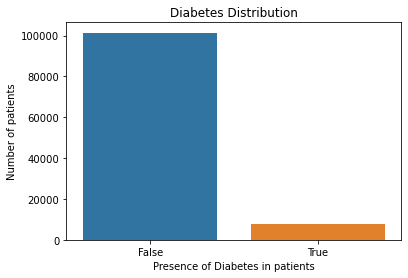

In [41]:
#Check how many patients have diabetes
sns.countplot(x = 'Diabetes', data = df)
plt.title("Diabetes Distribution")
plt.xlabel("Presence of Diabetes in patients");
plt.ylabel("Number of patients")
plt.show()

False    92.81
True      7.19
Name: Diabetes, dtype: float64

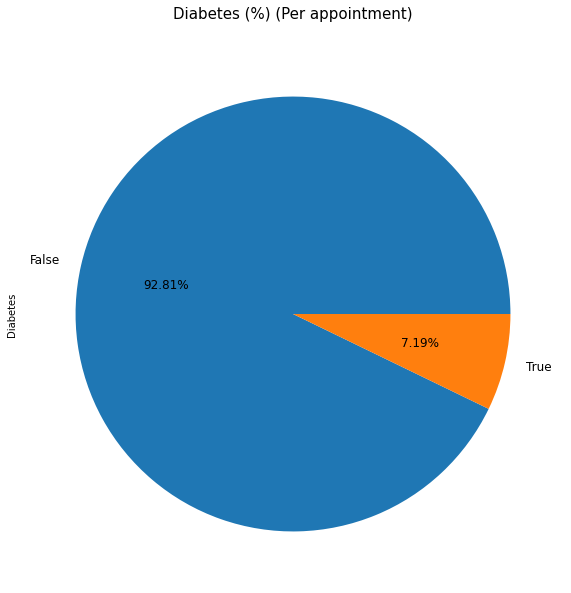

In [42]:
#Check how many patients have diabetes in terms of percentage
PieChart(df, 'Diabetes')

> 7.19% of the patients have diabetes

**Check the relationship between `Diabetes` and `Show`**

In [43]:
#Group the Diabetes and Show columns
df.groupby(['Diabetes'], as_index=True)["Show"].mean()

Diabetes
False    0.798100
True     0.820232
Name: Show, dtype: float64

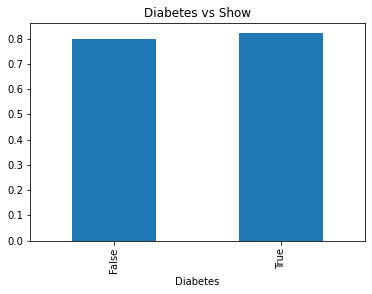

In [44]:
#Draw a bar graph of the relationship between the Diabetes patients and Show in terms of mean
df.groupby(['Diabetes'], as_index=True)["Show"].mean().plot(title = 'Diabetes vs Show', kind= 'bar');

> People with diabetes tend to show up to their appointments

**Check the `Alcoholism` distribution in the patients**

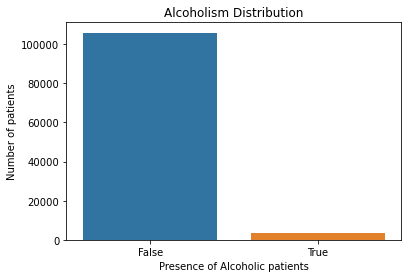

In [45]:
#Check how many patients are alcoholic
sns.countplot(x = 'Alcoholism', data = df)
plt.title("Alcoholism Distribution")
plt.xlabel("Presence of Alcoholic patients");
plt.ylabel("Number of patients")
plt.show()

False    96.95
True      3.05
Name: Alcoholism, dtype: float64

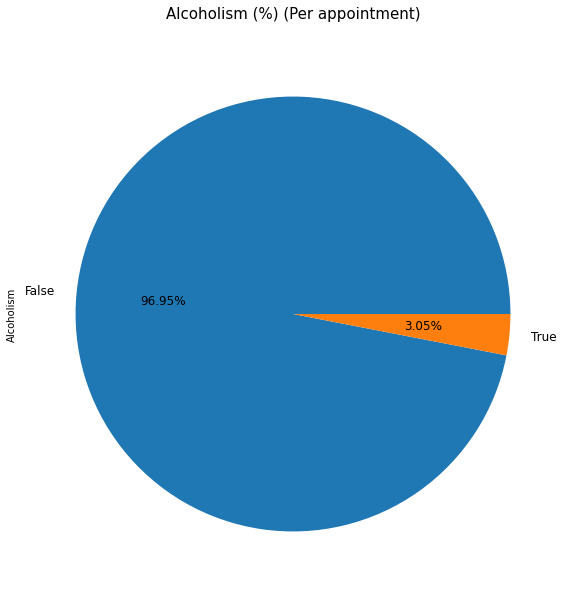

In [46]:
#Check how many patients are alcoholic in terms of percentage
PieChart(df, 'Alcoholism')

> 3.05% of the patients are alcoholic.

**Check the relationship between `Alcoholism` and `Show`**

In [47]:
#Group Alcohlism and Show columns
df.groupby(['Alcoholism'], as_index=True)["Show"].mean()

Alcoholism
False    0.799651
True     0.800961
Name: Show, dtype: float64

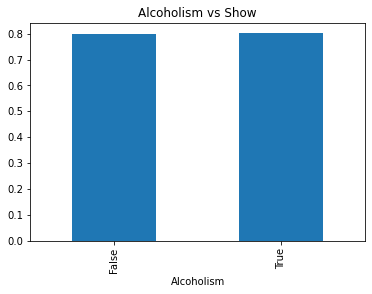

In [48]:
#Draw a bar graph of the relationship between the Diabetes patients and Show in terms of mean
df.groupby(['Alcoholism'], as_index=True)["Show"].mean().plot(title = 'Alcoholism vs Show' ,kind= 'bar');

**Check the `Handicap` distribution in the patients**

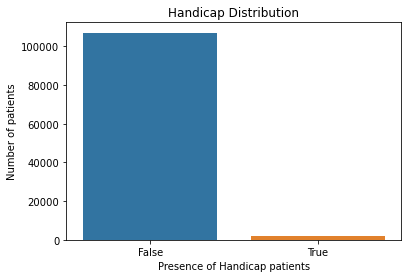

In [49]:
#Check how many patients are handicap
sns.countplot(x = 'Handicap', data = df)
plt.title("Handicap Distribution")
plt.xlabel("Presence of Handicap patients");
plt.ylabel("Number of patients")
plt.show()

False    97.97
True      2.03
Name: Handicap, dtype: float64

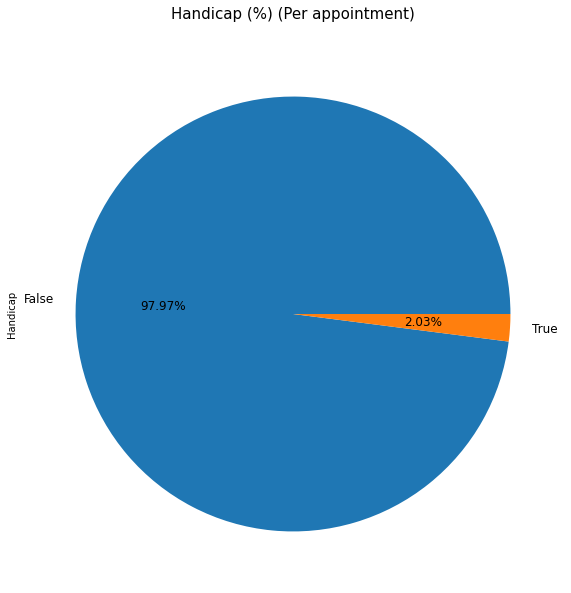

In [50]:
#Check how many patients are handicap in terms of percentage
PieChart(df, 'Handicap')

> 2.03% of patients are Handicap

**Check the relationship between `Handicap` and `Show`**

In [51]:
#Group Alcohlism and Show columns and find the mean
df.groupby(['Handicap'], as_index=True)["Show"].mean()

Handicap
False    0.799260
True     0.820524
Name: Show, dtype: float64

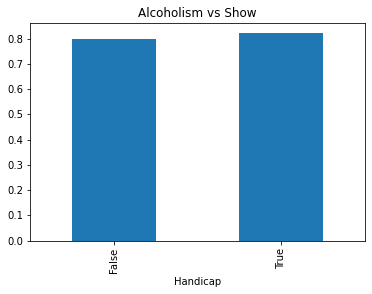

In [52]:
#Draw a bar graph of the relationship between the Handicap patients and Show in terms of mean
df.groupby(['Handicap'], as_index=True)["Show"].mean().plot(title = 'Alcoholism vs Show', kind= 'bar');

> Patients who are diabetic tend to attend their appointment more.

### Q5: Is there a correlation between having a scholarship and showing up for appointments?

**Check the `Scholarship` distribution in the patients**

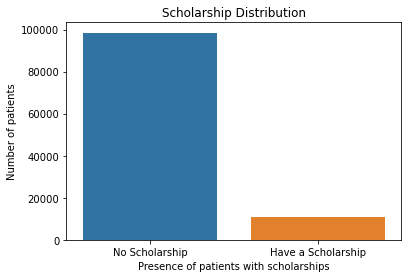

In [53]:
#Check how many patients are handicap
ax = sns.countplot(x = 'Scholarship', data = df)
x_ticks_labels=['No Scholarship', 'Have a Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.title("Scholarship Distribution")
plt.xlabel("Presence of patients with scholarships");
plt.ylabel("Number of patients")
plt.show()

False    90.18
True      9.82
Name: Scholarship, dtype: float64

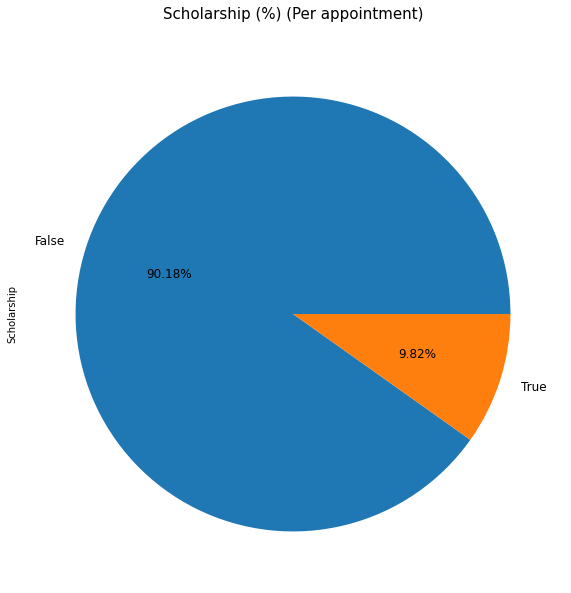

In [54]:
#Check how many patients are handicap in terms of percentage
PieChart(df, 'Scholarship')

> 9.82% of the patients have scholarships

**Check the relationship between `Scholarship` and `Show`**

In [55]:
#Group Scholarship and Show columns and find mean
df.groupby(['Scholarship'], as_index=True)["Show"].mean()

Scholarship
False    0.803578
True     0.764004
Name: Show, dtype: float64

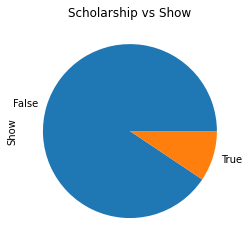

In [56]:
#Draw a pie chart of the relationship between the Scholarship patients and Show in terms of sum
df.groupby(['Scholarship'], as_index=True)["Show"].sum().plot(x="Scholarship", y="Show", title= "Scholarship vs Show",kind="pie");

> Patients who do not have scholarships tend to attend their appointments more.

### Q6: Is there any correlation between a patient's age and diseases?


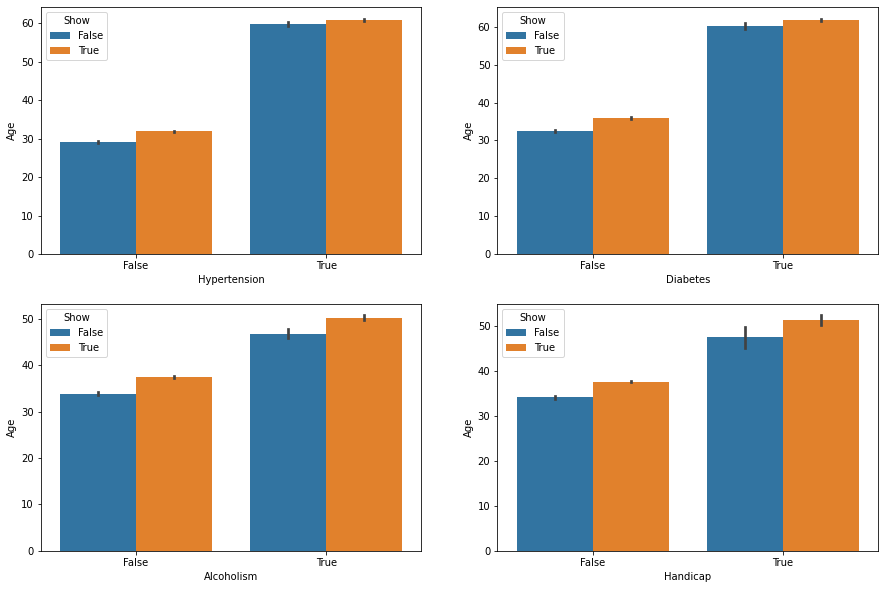

In [57]:
#Plot a bar graph that shows the relationship between age and diseases
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Hypertension', y = 'Age', data = df, hue= 'Show')
plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age', data = df, hue= 'Show')
plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = df, hue= 'Show')
plt.subplot(2,2,4)
sns.barplot(x = 'Handicap', y = 'Age', data = df, hue= 'Show')
plt.show()

> All the diseases mostly affects the elderly than the younger patients.

### Q7: Does SMS Recieved affect the attendance of a patient to the appointment?

**Check the number of patients that recieved a message**

False    67.72
True     32.28
Name: SMS_received, dtype: float64

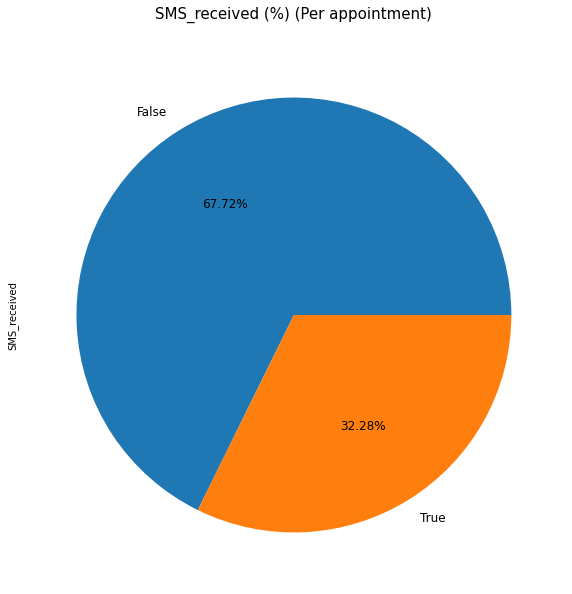

In [58]:
#Check the number of patients that recieved a message in terms of percentage
PieChart(df, 'SMS_received')

> 32.28% of the patients recieved the message to remind them of their appointment

**Check the relationship between `SMS_recieved` and `Show`**

In [59]:
# Group SMS_recieved and Show column and find the mean
df.groupby(['SMS_received'], as_index=True)["Show"].mean()

SMS_received
False    0.835627
True     0.724313
Name: Show, dtype: float64

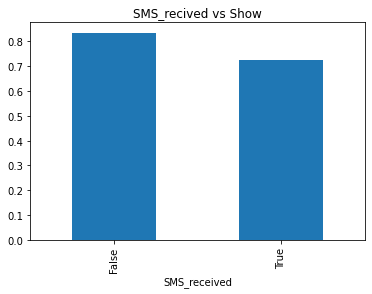

In [60]:
#Draw a bar graph of the relationship between the SMS_recived and Show in terms of mean
df.groupby(['SMS_received'], as_index=True)["Show"].mean().plot(title = "SMS_recived vs Show", kind="bar");

> Patients who did not recieve an SMS attended their apppointment.

<a id='conclusions'></a>
## Conclusions

1. 79.97% of the patients attended their scheduled appointment


2. Most patients range from 0 years to late 50's.Younger patients tend to miss their appointments more than the people over 60.


3. Female patients make up 65% of the patients. The male patients tend not to attend the scheduled appointment.


4. 19.74% of the patients have hypertension, 7.19% of the patients have diabetes, 3.05% of the patients are alcoholic and 2.03% of patients are Handicap. Patients with underlying diseases tend to attend their appointment more.


5. 9.82% of the patients have scholarships. Patients who do not have scholarships tend to attend their appointments more.


6. All the diseases mostly affects the elderly than the younger patients.


7. 32.28% of the patients recieved the message to remind them of their appointment.Patients who did not recieve an SMS attended their apppointment.


## Limitation


1. The SMS_recieved does not give us more information such as when they recieved the message hence does not help in analysis to determine if it affects their attendance.


2. The location of the hospital is unknown hence the Neighbourhood column does help in analysis.

## References:
1. https://sparkbyexamples.com/pandas/pandas-isin-explained-with-examples/
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
3. https://pbpython.com/pandas_dtypes.html